# 데이터 시각화 II
### 실습과제
1. 고급 차트 유형에서 제시한 5개 시각화 방법 사용해보기 <br>
- 히트맵 <br>
- 트리맵 <br>
- 버블차트 <br>
- 레이더 차트 <br>
- 생키 다이어그램 <br>
2. 시각화한 차트를 인터렉티브하게 만들어보기 <br>

3. 지리 정보 데이터 시각화 해보기 <br>
- geopandas <br>
- folium <br>



#### 데이터 전처리

In [106]:
import pandas as pd

#데이터 불러오기
df = pd.read_csv('car_prices.csv')
#데이터 처음 몇줄 가져오기
df.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,45.0,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,41.0,14282.0,white,black,volvo na rep/world omni,27500.0,27750.0,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,43.0,2641.0,gray,black,financial services remarketing (lease),66000.0,67000.0,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)


In [107]:
#데이터 정보 확인하기
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558837 entries, 0 to 558836
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          558837 non-null  int64  
 1   make          548536 non-null  object 
 2   model         548438 non-null  object 
 3   trim          548186 non-null  object 
 4   body          545642 non-null  object 
 5   transmission  493485 non-null  object 
 6   vin           558833 non-null  object 
 7   state         558837 non-null  object 
 8   condition     547017 non-null  float64
 9   odometer      558743 non-null  float64
 10  color         558088 non-null  object 
 11  interior      558088 non-null  object 
 12  seller        558837 non-null  object 
 13  mmr           558799 non-null  float64
 14  sellingprice  558825 non-null  float64
 15  saledate      558825 non-null  object 
dtypes: float64(4), int64(1), object(11)
memory usage: 68.2+ MB


In [108]:
# 이상치 탐지를 위한 요약 통계
print("Summary_stats:\n", df.describe())

# 데이터 결측치 확인
print('Missing Value:\n', df.isnull().sum())

Summary_stats:
                 year      condition       odometer            mmr  \
count  558837.000000  547017.000000  558743.000000  558799.000000   
mean     2010.038927      30.672365   68320.017767   13769.377495   
std         3.966864      13.402832   53398.542821    9679.967174   
min      1982.000000       1.000000       1.000000      25.000000   
25%      2007.000000      23.000000   28371.000000    7100.000000   
50%      2012.000000      35.000000   52254.000000   12250.000000   
75%      2013.000000      42.000000   99109.000000   18300.000000   
max      2015.000000      49.000000  999999.000000  182000.000000   

        sellingprice  
count  558825.000000  
mean    13611.358810  
std      9749.501628  
min         1.000000  
25%      6900.000000  
50%     12100.000000  
75%     18200.000000  
max    230000.000000  
Missing Value:
 year                0
make            10301
model           10399
trim            10651
body            13195
transmission    65352
vin    

In [109]:
df.describe()

,year,condition,odometer,mmr,sellingprice
count,558837.000000,547017.000000,558743.000000,558799.000000,558825.000000
mean,2010.038927,30.672365,68320.017767,13769.377495,13611.358810
std,3.966864,13.402832,53398.542821,9679.967174,9749.501628
min,1982.000000,1.000000,1.000000,25.000000,1.000000
25%,2007.000000,23.000000,28371.000000,7100.000000,6900.000000
50%,2012.000000,35.000000,52254.000000,12250.000000,12100.000000
75%,2013.000000,42.000000,99109.000000,18300.000000,18200.000000
max,2015.000000,49.000000,999999.000000,182000.000000,230000.000000


In [110]:
# 'make' 또는 'model' 열에 결측치가 있는 행 삭제
df_cleaned = df.dropna(subset=['make', 'model','body','color','interior'], how='any', axis=0)

# 'saledate'의 시간 부분 제거 및 datetime 형식으로 변환
df_cleaned['saledate'] = pd.to_datetime(df_cleaned['saledate'].apply(lambda x: ' '.join(x.split(' ')[:4]) if isinstance(x, str) else x), errors='coerce')

# IQR을 이용한 이상치 계산
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# 'year', 'mmr', 'sellingprice' 열의 이상치 제거
df_cleaned = remove_outliers(df_cleaned, 'year')
df_cleaned = remove_outliers(df_cleaned, 'mmr')
df_cleaned = remove_outliers(df_cleaned, 'sellingprice')

# 'mmr'과 'sellingprice'의 결측치를 같은 모델의 평균값으로 대체
df_cleaned['mmr'] = df_cleaned.groupby('model')['mmr'].transform(lambda x: x.fillna(x.mean()))
df_cleaned['sellingprice'] = df_cleaned.groupby('model')['sellingprice'].transform(lambda x: x.fillna(x.mean()))

# 'saledate'의 결측치를 같은 모델의 평균 날짜로 대체
df_cleaned['saledate'] = df_cleaned.groupby('model')['saledate'].transform(lambda x: x.fillna(x.mean()))

# 'saledate'에서 연도, 월, 일을 추출
df_cleaned['saledateYear'] = df_cleaned['saledate'].dt.year
df_cleaned['saledateMonth'] = df_cleaned['saledate'].dt.month
df_cleaned['saledateDay'] = df_cleaned['saledate'].dt.day

# 지정한 열만 선택
df_selected = df_cleaned[['year', 'make', 'model', 'body', 'color', 'interior', 'mmr', 'sellingprice', 'saledate', 'saledateYear', 'saledateMonth', 'saledateDay']]

print(df_selected.head())
print(df_selected.isnull().sum())
print(df_selected.describe())


/var/folders/yn/g97n5dd122qdr_rss5p0p4_40000gn/T/ipykernel_29740/1566102704.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



   year    make     model   body  color interior      mmr  sellingprice  \
0  2015     Kia   Sorento    SUV  white    black  20500.0       21500.0   
1  2015     Kia   Sorento    SUV  white    beige  20800.0       21500.0   
2  2014     BMW  3 Series  Sedan   gray    black  31900.0       30000.0   
3  2015   Volvo       S60  Sedan  white    black  27500.0       27750.0   
5  2015  Nissan    Altima  Sedan   gray    black  15350.0       10900.0   

    saledate  saledateYear  saledateMonth  saledateDay  
0 2014-12-16          2014             12           16  
1 2014-12-16          2014             12           16  
2 2015-01-15          2015              1           15  
3 2015-01-29          2015              1           29  
5 2014-12-30          2014             12           30  
year             0
make             0
model            0
body             0
color            0
interior         0
mmr              0
sellingprice     0
saledate         0
saledateYear     0
saledateMonth    

In [111]:
df_copy =df.copy()
df =  df_selected
df.head()

,year,make,model,body,color,interior,mmr,sellingprice,saledate,saledateYear,saledateMonth,saledateDay
0,2015,Kia,Sorento,SUV,white,black,20500.0,21500.0,2014-12-16,2014,12,16
1,2015,Kia,Sorento,SUV,white,beige,20800.0,21500.0,2014-12-16,2014,12,16
2,2014,BMW,3 Series,Sedan,gray,black,31900.0,30000.0,2015-01-15,2015,1,15
3,2015,Volvo,S60,Sedan,white,black,27500.0,27750.0,2015-01-29,2015,1,29
5,2015,Nissan,Altima,Sedan,gray,black,15350.0,10900.0,2014-12-30,2014,12,30


In [112]:
# 데이터 타입 확인
print("#"*10)
print("데이터 타입 확인")
print("Data Types:\n", df.dtypes)

# 범주형 및 수치형 데이터 분리하여 분석
categorical_cols = df.select_dtypes(include=['object', 'category']).columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

print("#"*10)
print("범주형 데이터 분리하여 분석")
print("\nCategorical Columns:\n", categorical_cols)

print("#"*10)
print("수치형 데이터 분리하여 분석")
print("\nNumerical Columns:\n", numerical_cols)

##########
데이터 타입 확인
Data Types:
 year                      int64
make                     object
model                    object
body                     object
color                    object
interior                 object
mmr                     float64
sellingprice            float64
saledate         datetime64[ns]
saledateYear              int32
saledateMonth             int32
saledateDay               int32
dtype: object
##########
범주형 데이터 분리하여 분석

Categorical Columns:
 Index(['make', 'model', 'body', 'color', 'interior'], dtype='object')
##########
수치형 데이터 분리하여 분석

Numerical Columns:
 Index(['year', 'mmr', 'sellingprice'], dtype='object')


In [113]:
"""
상관계수 값이 1에 가까울수록 완벽한 양의 상관관계, -1에 가까울수록 완벽한 음의 상관관계를 나타냅니다.
"""

# 피어슨 상관 계수
print("Pearson Correlation:\n", df[numerical_cols].corr(method='pearson'))


Pearson Correlation:
                   year       mmr  sellingprice
year          1.000000  0.659814      0.644148
mmr           0.659814  1.000000      0.976251
sellingprice  0.644148  0.976251      1.000000


# 1. 히트맵(Heatmap)
    - 히트맵은 행렬 형식의 데이터를 색상으로 시각화하여 데이터의 크기나 빈도 등을 파악하기 위해 사용되는 도구
    - 색상이 짙어질수록 데이터 값이 크거나 빈도가 높음을 나타냄
- 예시
    - 상관 행렬: 변수들 간의 상관 관계 시각화
    - 웹사이트 클릭: 웹페이지의 사용자 클릭 빈도를 시각화

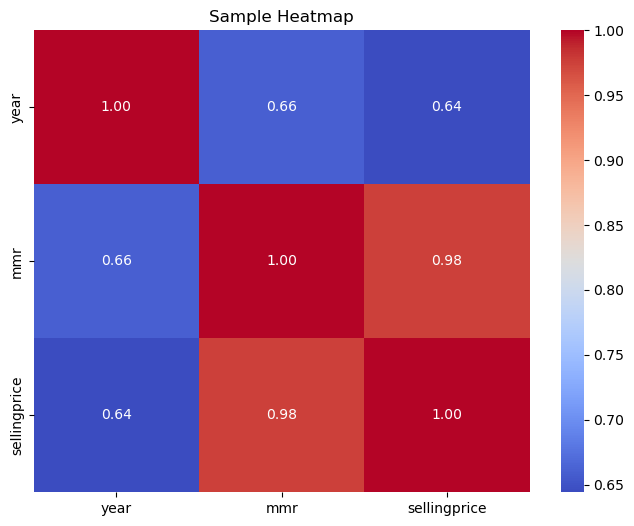

In [114]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# 수치형 데이터만 선택
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

# 상관 행렬 계산
corr = df[numeric_cols].corr()

# 히트맵 생성
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm',fmt='.2f')
plt.title('Sample Heatmap')
plt.show()

# 2. 트리맵(Treemap)
    - 트리맵은 계층적 데이터를 직사각형으로 시각화하여 데이터의 크기와 비율을 나타냄
    - 각 직사각형의 크기는 해당 데이터의 크기를 나타내며 계층 구조 내의 비율을 비교하는 데 탁월함
- 예시
    - 파일 시스템: 디스크 사용량을 시각화하여 폴더와 파일의 크기를 비교
    - 사업 부분별 매출: 각 부분별 매출 비율을 시각화

In [115]:
!pip install squarify

In [116]:
import plotly.express as px
import numpy as np

# Treemap에 사용할 데이터 준비
# 필요한 컬럼: 'year', 'make', 'model', 'sellingprice'
# 데이터 프레임을 새로운 데이터 프레임으로 생성
treemap_df = df[['make', 'model', 'sellingprice']]

# Treemap 생성
fig = px.treemap(treemap_df, path=[px.Constant("all cars"), 'make', 'model'], values='sellingprice',
                 color='sellingprice', hover_data=['make', 'model'],
                 color_continuous_scale='RdBu',
                 color_continuous_midpoint=np.average(treemap_df['sellingprice'], weights=treemap_df['sellingprice']))

# 레이아웃 업데이트
fig.update_layout(margin=dict(t=50, l=25, r=25, b=25))

# Treemap 표시
fig.show()

# 3. 버블차트 (Bubbel chart)
    - 버블 차트는 산점도의 확장된 형태로, 데이터 포인트의 크기를 추가 변수로 시각화
    - 각 버블의 위치는 두 변수의 값을 나타내고, 크기는 세 번째 변수를 나타냄
- 예시:
    - GDP와 기대 수명: 각 국가의 GDP와 기대 수명을 시각화하고, 버블 크기로 인구 수를 나타냄
    - 매출과 이익률: 제품별 매출과 이익률을 시각화하고, 버블 크기로 시장 점유율을 나타냄

In [117]:
# 모델별 판매량 계산
sales_volume = df['model'].value_counts().reset_index()
sales_volume.columns = ['model', 'salesvolume']

# 판매량을 원래 데이터프레임에 추가
df = df.merge(sales_volume, on='model')

df.describe()

,year,mmr,sellingprice,saledate,saledateYear,saledateMonth,saledateDay,salesvolume
count,512612.000000,512612.000000,512612.000000,512612,512612.000000,512612.000000,512612.000000,512612.000000
mean,2010.314245,13048.753931,12877.254781,2015-03-06 06:22:29.905191680,2014.905978,3.781162,15.384181,4947.071563
min,2001.000000,25.000000,1.000000,2014-01-01 00:00:00,2014.000000,1.000000,1.000000,1.000000
25%,2008.000000,7550.000000,7300.000000,2015-01-21 00:00:00,2015.000000,1.000000,8.000000,1225.000000
50%,2012.000000,12250.000000,12100.000000,2015-02-13 00:00:00,2015.000000,2.000000,16.000000,3487.000000
75%,2013.000000,17700.000000,17600.000000,2015-05-22 00:00:00,2015.000000,6.000000,22.000000,7024.000000
max,2015.000000,34700.000000,33525.000000,2015-07-21 00:00:00,2015.000000,12.000000,31.000000,19116.000000
std,3.479338,7347.829129,7429.718534,NaN,0.291860,3.210005,8.547369,4611.999632


In [138]:
# 기아자동차 데이터 필터링
kia_df = df[df['make'] == 'Kia']

kia_grouped = kia_df.groupby('model').agg({'mmr':'mean', 'sellingprice':'mean', 'salesvolume':'mean'})
kia_grouped[['mmr','sellingprice']] = kia_grouped[['mmr','sellingprice']].astype(int)
kia_df = kia_grouped

kia_df.head()

,mmr,sellingprice,salesvolume
model,,,
Amanti,3180,3094,101.0
Borrego,9127,8722,81.0
Cadenza,20898,20839,245.0
Forte,10423,10263,2750.0
Optima,13552,13400,4388.0


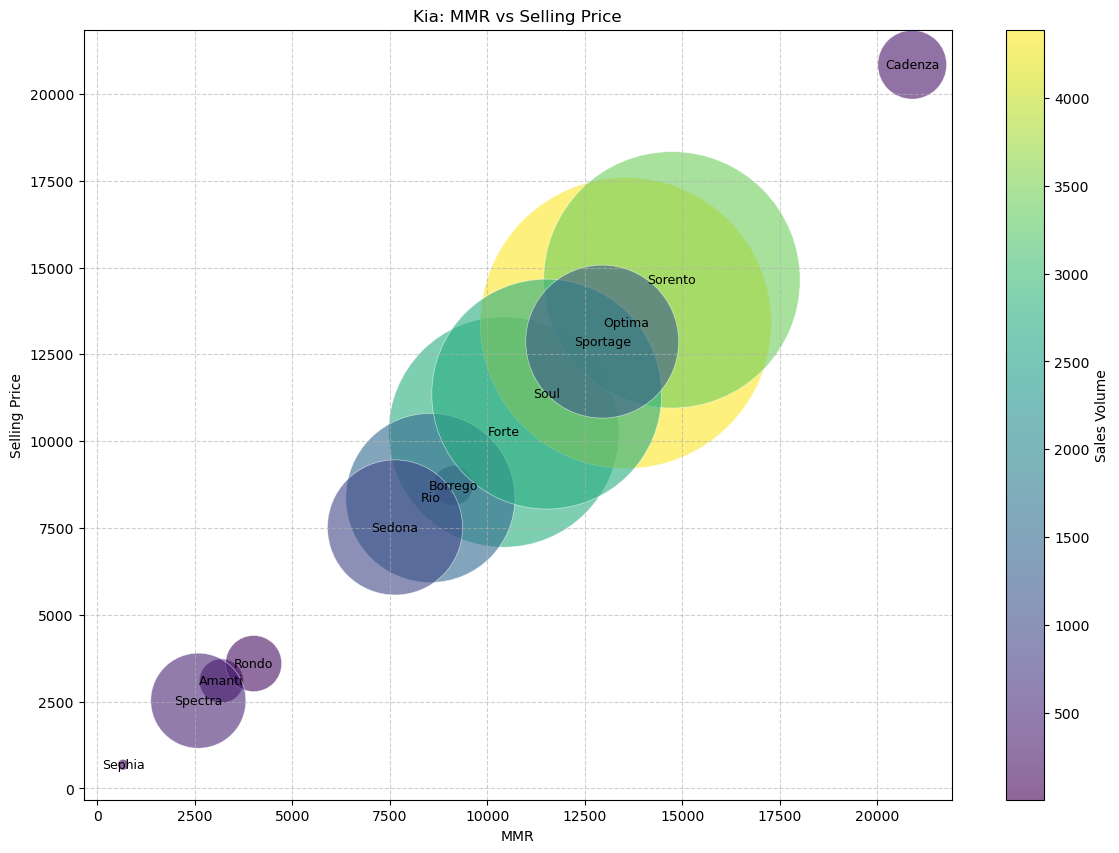

In [146]:
# 버블 차트 생성
plt.figure(figsize=(14, 10))
scatter = plt.scatter(x = kia_df['mmr'], y = kia_df['sellingprice'], 
                      s=kia_df['salesvolume']*10, alpha=0.6, 
                      c=kia_df['salesvolume'], cmap='viridis', 
                      edgecolor='w', linewidth=0.5)

# 데이터 라벨 추가
for i in range(kia_df.shape[0]):
    plt.text(kia_df['mmr'].iloc[i], kia_df['sellingprice'].iloc[i], 
             kia_df.index[i], fontsize=9, ha='center', va='center')

plt.title('Kia: MMR vs Selling Price')
plt.xlabel('MMR')
plt.ylabel('Selling Price')
plt.colorbar(scatter, label='Sales Volume')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

# 4. 레이더 차트 (Radar Chart)
    - 여러 변수를 축으로 하여 다각형으로 시각화하는 방법
    - 각 축은 하나의 변수를 나타내며, 중앙에서 각 축까지의 거리는 변수의 값
- 예시:
    - 선수의 성과 평가: 다양한 성과 지표를 시각화하여 선수의 강점과 약점 파악
    - 제품 비교: 여러 제품의 다양한 특성을 시각화하여 비교

In [147]:
df.head()

,year,make,model,body,color,interior,mmr,sellingprice,saledate,saledateYear,saledateMonth,saledateDay,salesvolume
0,2015,Kia,Sorento,SUV,white,black,20500.0,21500.0,2014-12-16,2014,12,16,3407
1,2015,Kia,Sorento,SUV,white,beige,20800.0,21500.0,2014-12-16,2014,12,16,3407
2,2014,BMW,3 Series,Sedan,gray,black,31900.0,30000.0,2015-01-15,2015,1,15,7419
3,2015,Volvo,S60,Sedan,white,black,27500.0,27750.0,2015-01-29,2015,1,29,1151
4,2015,Nissan,Altima,Sedan,gray,black,15350.0,10900.0,2014-12-30,2014,12,30,19116


In [179]:
# BMW 데이터 필터링
bmw_df = df[df['make'] == 'BMW']

# color별 판매량 계산
color_sales = bmw_df.groupby('color')['salesvolume'].sum()

# 판매량을 1~10 사이로 스케일링
min_sales = color_sales.min()
max_sales = color_sales.max()
scaled_sales = 1 + 10 * (color_sales - min_sales) / (max_sales - min_sales)

# 레이더 차트를 위한 데이터 준비
labels = scaled_sales.index # 색상별 판매량의 색상 이름(색상 라벨)을 가져옴
values = scaled_sales.values    # 스케일링된 판매량 값을 가져옴
num_vars = len(labels)  # 색상의 개수

bmw_df.head()


,year,make,model,body,color,interior,mmr,sellingprice,saledate,saledateYear,saledateMonth,saledateDay,salesvolume
2,2014,BMW,3 Series,Sedan,gray,black,31900.0,30000.0,2015-01-15,2015,1,15,7419
16,2014,BMW,5 Series,Sedan,black,black,34200.0,30000.0,2015-02-03,2015,2,3,3371
27,2014,BMW,3 Series,Sedan,black,—,32200.0,30500.0,2015-01-15,2015,1,15,7419
28,2014,BMW,3 Series,Sedan,white,black,30200.0,27500.0,2015-01-15,2015,1,15,7419
50,2014,BMW,X1,SUV,white,black,23700.0,26500.0,2014-12-18,2014,12,18,270


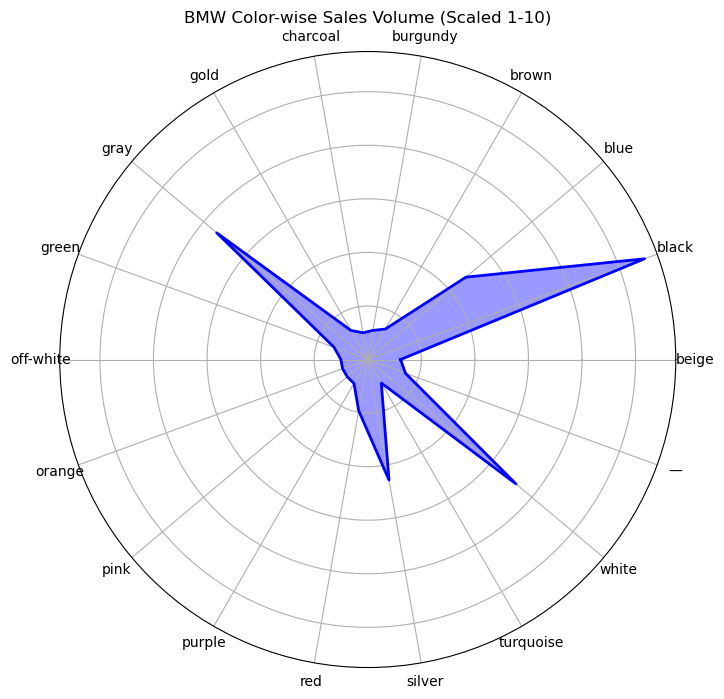

In [180]:


# 레이더 차트 그리기
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
values = np.concatenate((values, [values[0]]))  # 값들을 닫아줌
angles += angles[:1]  # 각도도 닫아줌

fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))
ax.fill(angles, values, color='blue', alpha=0.4)
ax.plot(angles, values, color='blue', linewidth=2)

ax.set_yticklabels([])  # 원형 눈금 지움
ax.set_xticks(angles[:-1])
ax.set_xticklabels(labels)

plt.title('BMW Color-wise Sales Volume (Scaled 1-10)')
plt.show()

# 5. 생키 다이어그램 (Sankey Diagram)
    - Sankey 다이어그램은 데이터의 흐름과 비율을 시각화하는 방법
    - 흐름의 두께가 데이터의 크기를 나타냄
- 예시
    - 에너지 소비 흐름: 에너지의 생산부터 소비까지의 흐름 시각화
    - 재정 흐름: 자금의 유입과 유출 시각화

In [182]:
import plotly.graph_objects as go

# Volvo 데이터 필터링
volvo_df = df[df['make'] == 'Volvo']

# body, year, salesvolume에 대한 그룹화된 데이터 준비
grouped = volvo_df.groupby(['body', 'year'])['salesvolume'].sum().reset_index()

# Sankey 다이어그램을 위한 데이터 준비
# sources, targets, values 생성
sources = list(grouped['body']) + list(grouped['year'].astype(str))
targets = list(grouped['year'].astype(str)) + ['Sales Volume'] * len(grouped)
values = list(grouped['salesvolume']) + list(grouped['salesvolume'])

# 모든 노드 (중복 제거)
all_nodes = list(pd.concat([pd.Series(sources), pd.Series(targets)]).unique())

# 노드 인덱스 매핑
node_map = {name: idx for idx, name in enumerate(all_nodes)}
source_indices = pd.Series(sources).map(node_map)
target_indices = pd.Series(targets).map(node_map)

# Sankey 다이어그램 생성
fig = go.Figure(data=[go.Sankey(
    node=dict(
        pad=15,
        thickness=20,
        line=dict(color="black", width=0.5),
        label=all_nodes
    ),
    link=dict(
        source=source_indices,
        target=target_indices,
        value=values
    )
)])

fig.update_layout(title_text="Volvo Body to Year to Sales Volume Flow", font_size=10)
fig.show()